In [12]:
import pandas as pd
from google.colab import files


# Step 1: Load the dataset
file_path = "/content/bank .csv"  # Ensure this file is in the working directory
df = pd.read_csv(file_path)

# Step 2: Check DataFrame info and perform the required analysis
print("DataFrame Info:")
df.info()

# (a) Identify columns with dtype=object
object_columns = df.select_dtypes(include='object').columns
print("\nColumns with dtype=object:")
print(object_columns)

# (b) Unique values of object columns
print("\nUnique values in object columns:")
for col in object_columns:
    print(f"{col}: {df[col].unique()}")

# (c) Total number of null values in each column
print("\nTotal null values in each column:")
print(df.isnull().sum())

# Step 3: Drop object columns and save the new DataFrame
numeric_df = df.drop(columns=object_columns)
numeric_df.to_csv("banknumericdata.csv", index=False)
print("\nNew numeric DataFrame saved as 'banknumericdata.csv'")

# Step 4: Read "banknumericdata.csv" and find summary statistics
numeric_data = pd.read_csv("banknumericdata.csv")
print("\nSummary statistics of numeric DataFrame:")
print(numeric_data.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Columns with dtype=object:
Index(['job', 'marital', 'education', 'default', 'housi

In [15]:
import pandas as pd
from google.colab import files

# Step 1: Load the dataset
file_path = "medical_students_dataset.csv"  # Ensure the file is in your working directory
df = pd.read_csv(file_path)

# Step 2: Check info of the DataFrame and identify columns with missing values
print("DataFrame Info:")
df.info()

print("\nTotal null values in each column:")
null_values = df.isnull().sum()
print(null_values)

# Step 3: Fill missing values
# Decide on methods to fill missing values
for column in df.columns:
    if null_values[column] > 0:
        print(f"\nFilling missing values for column: {column}")
        if df[column].dtype == 'object':
            # Fill with mode (most frequent value) for categorical data
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
            print(f"Filled with mode: {mode_value}")
        else:
            # Fill with mean for numeric data
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
            print(f"Filled with mean: {mean_value}")

# Verify if missing values are handled
print("\nTotal null values after filling:")
print(df.isnull().sum())

# Step 4: Check for duplicate values
duplicates = df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicates}")

if duplicates > 0:
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")

# Save the cleaned DataFrame (optional)
df.to_csv("medica_students_cleaned.csv", index=False)
print("\nCleaned DataFrame saved as 'medica_students_cleaned.csv'")


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Total null values in each column:
Student ID        20000
Age               20000
Gender            20000
Height            20000

<ipython-input-15-ec355ee1b229>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)
<ipython-input-15-ec355ee1b229>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

Filled with mode: No

Filling missing values for column: Smoking
Filled with mode: No

Total null values after filling:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

Total duplicate rows: 12572
Duplicate rows removed.

Cleaned DataFrame saved as 'medica_students_cleaned.csv'


In [16]:
#problem-1
import pandas as pd
from google.colab import files

# Load the Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Create a subset of the DataFrame
subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Filter for first-class passengers (Pclass = 1)
first_class = subset[subset['Pclass'] == 1]

# Calculate statistics for the 'Fare' column
fare_mean = first_class['Fare'].mean()
fare_median = first_class['Fare'].median()
fare_max = first_class['Fare'].max()
fare_min = first_class['Fare'].min()

print(f"Fare - Mean: {fare_mean}, Median: {fare_median}, Max: {fare_max}, Min: {fare_min}")


Fare - Mean: 84.1546875, Median: 60.287499999999994, Max: 512.3292, Min: 0.0


In [17]:
#problem-2
# Check for null values in the 'Age' column
null_age_count = first_class['Age'].isnull().sum()
print(f"Total null values in 'Age': {null_age_count}")

# Drop rows with missing 'Age'
first_class_cleaned = first_class.dropna(subset=['Age'])
print(f"Rows after dropping null 'Age': {len(first_class_cleaned)}")


Total null values in 'Age': 30
Rows after dropping null 'Age': 186


In [18]:
#problem-3

# Apply one-hot encoding to the 'Embarked' column
one_hot_embarked = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Add the new columns to the original DataFrame
df = pd.concat([df, one_hot_embarked], axis=1)

# Drop the original 'Embarked' column
df.drop(columns=['Embarked'], inplace=True)

# Verify the changes
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


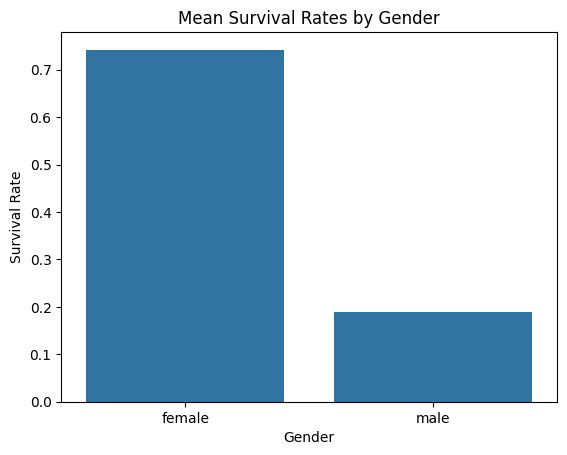

In [19]:
#problem-4
import matplotlib.pyplot as plt
import seaborn as sns

# Compare mean survival rates by gender
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(survival_by_gender)

# Visualization
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title("Mean Survival Rates by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()


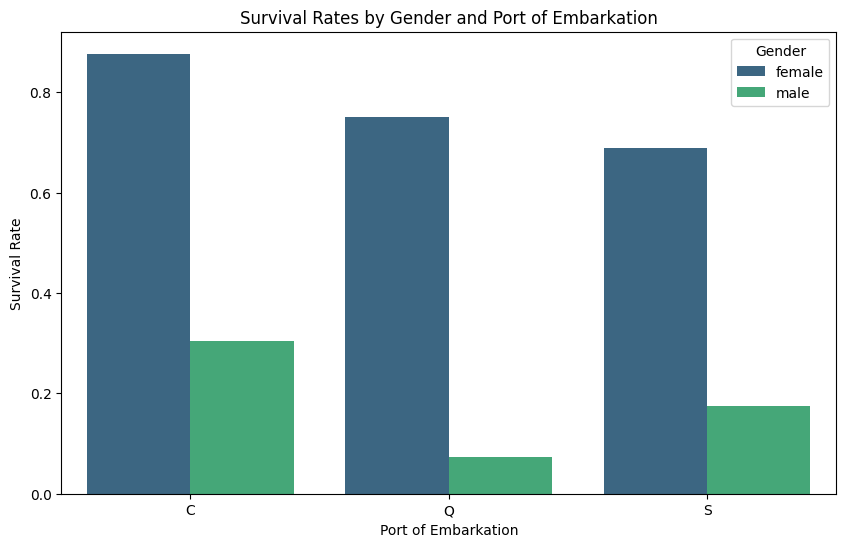

In [21]:
#problem-5

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Filter out rows with missing values in 'Embarked' and 'Survived' columns
df = df.dropna(subset=['Embarked', 'Survived'])

# Use one-hot encoding to create binary columns for 'Embarked'
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1)

# Calculate survival rates grouped by gender and port of embarkation
survival_by_gender_port = (
    df.groupby(['Sex', 'Embarked'])['Survived']
    .mean()
    .reset_index()
    .rename(columns={'Survived': 'Survival Rate'})
)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    data=survival_by_gender_port,
    x="Embarked",
    y="Survival Rate",
    hue="Sex",
    palette="viridis"
)
plt.title("Survival Rates by Gender and Port of Embarkation")
plt.ylabel("Survival Rate")
plt.xlabel("Port of Embarkation")
plt.legend(title="Gender")
plt.show()
